# July 15, 2022: Selecting a subset of ROIs and colormaps

In [1]:
import os
import sys
from os.path import join as pjoin

import numpy as np
import pandas as pd
import pickle, random
from tqdm import tqdm
from scipy.stats import zscore

# plotting
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.rcParamsDefault['font.family'] = "sans-serif"
plt.rcParamsDefault['font.sans-serif'] = "Arial"
plt.rcParams['font.size'] = 14
plt.rcParams["errorbar.capsize"] = 0.5

# main dirs
proj_dir = pjoin(os.environ['HOME'], 'network_dynamics')
results_dir = f"{proj_dir}/results"
month_dir = f"{proj_dir}/nb/jul22"

# folders
sys.path.insert(0, proj_dir)
import helpers.dataset_utils as dataset_utils

## ROI ordering

In [2]:
class ARGS(): pass
args = ARGS()

args.up_roi_idxs = np.array(
    # upwards time series
    [6, 7] + # dlPFC
    list(range(12, 20)) + # ACC, ant.-, post.-MCC, pre-SMA
    list(range(47, 51)) + # ant. ventral-, ant. dorsal-Insula
    [53, 54] + # BST
    [69, 70] + # ant/inf Thalamus
    list(range(73, 79)) + # med/post-, ant/lat-, ant/med-Thalamus,  
    [79, 80] # PAG
)

args.down_roi_idxs = np.array(
    # downwards time series
    list(range(0, 6)) + # OFC, vmPFC
    list(range(20, 25)) + # PCC
    list(range(59, 63)) + # ant.-, body-Hippocampus
    [83, 84] # Crusl-krienen
)

args.roi_idxs = np.concatenate([args.up_roi_idxs, args.down_roi_idxs])
args.num_rois = len(args.roi_idxs)

In [3]:
with open(f"{proj_dir}/data/max/exploratory_data_roi_indices.pkl", 'wb') as f:
    pickle.dump([args.up_roi_idxs, args.down_roi_idxs, args.roi_idxs], f)

## Colormap

In [4]:
# copied code from matplotlib
cmaps = {}

gradient = np.linspace(0, 1, 256)
gradient = np.vstack((gradient, gradient))


def plot_color_gradients(category, cmap_list):
    # Create figure and adjust figure height to number of colormaps
    nrows = len(cmap_list)
    figh = 0.35 + 0.15 + (nrows + (nrows - 1) * 0.1) * 0.22
    fig, axs = plt.subplots(nrows=nrows + 1, figsize=(6.4, figh))
    fig.subplots_adjust(top=1 - 0.35 / figh, bottom=0.15 / figh,
                        left=0.2, right=0.99)
    axs[0].set_title(f'{category} colormaps', fontsize=14)

    for ax, name in zip(axs, cmap_list):
        ax.imshow(gradient, aspect='auto', cmap=plt.get_cmap(name))
        ax.text(-0.01, 0.5, name, va='center', ha='right', fontsize=10,
                transform=ax.transAxes)

    # Turn off *all* ticks & spines, not just the ones with colormaps.
    for ax in axs:
        ax.set_axis_off()

    # Save colormap list for later.
    cmaps[category] = cmap_list

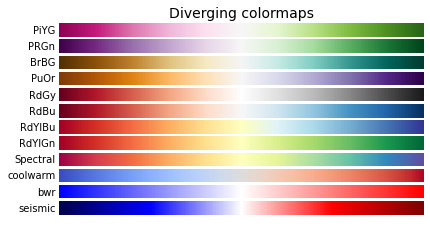

In [5]:
category = 'Diverging'
cmap_list = ['PiYG', 'PRGn', 'BrBG', 'PuOr', 'RdGy', 'RdBu', 'RdYlBu',
             'RdYlGn', 'Spectral', 'coolwarm', 'bwr', 'seismic']
plot_color_gradients(category,
                     cmap_list)

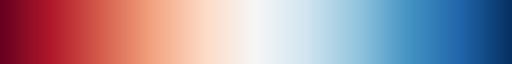

In [6]:
plt.get_cmap(cmap_list[5])

### looks great!

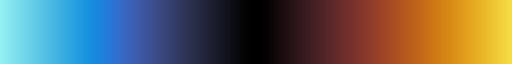

In [7]:
import cmasher as cmr
plt.get_cmap(cmr.iceburn)